<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Assignment_01_BinaryClassification_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Assignment 1: Neural Networks for Analysis of Tabular Data**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)



# **READ CAREFULLY**

The **_first_**  digit in your myUTSA ID (e.g. "abc123") will determine which dataset you are to analyze for this assignment and which type of neural network (i.e. classification or regression) you will need to construct. For example, if your myUTSA ID was **vue682**, then your first digit is the number `6`.

**---WARNING------WARNING------WARNING------WARNING------WARNING------WARNING---**

You are **not** free to choose any dataset for this assignment. If analyze the wrong dataset, your assignment will **NOT BE GRADED** and you will automatically receive a **`0`**. If you are uncertain which dataset you should be working on, contact your Instructor for help. Remember, your score in this assignment will have a large impact on your course grade so please be careful.


| First Digit myUTSA ID    | Dataset to Analyze      | Neural Network Type
--------------------------|-------------------------|-----------------
0                         | Hepatitis               | Binary Classification
1                         | Coimbra Breast Cancer   | Binary Classification
2                         | Parkinson Speech        | Binary Classification
3                         | Indian Liver            | Binary Classification
4                         | Thyroid Replacement     | Multiclass Classification
5                         | Wine Quality            | Multiclass Classification
6                         | Liver Disease           | Multiclass Classification
7                         | Bone Marrow Transplant  | Regression
8                         | German Breast Cancer    | Regression
9                         | Diabetes Progression    | Regression

#### **NOTE: You can only use this COLAB notebook if the first digit of your _myUTSA_ ID  is between `0` and `3`.**

# **The Purpose of Assignments**

In this course, **_Assignments_** are designed to help me (and you) assess your ability to transfer knowledge gained in completing class coding exercises to solving more realistic problems.

Assignments play a pivotal role in reinforcing your learning, as they require you to apply theoretical concepts to practical scenarios. This helps solidify your understanding and enhances your problem-solving skills. By tackling these assignments independently, you develop critical thinking and the ability to synthesize information from various sources. Moreover, assignments encourage you to explore topics more deeply, fostering intellectual curiosity and promoting a deeper engagement with the subject matter. Ultimately, these assignments are not just a measure of your learning, but a means to equip you with the skills needed for real-world applications and future challenges.

## **MAKE A COPY OF THIS NOTBOOK!**

For your assignment to be graded, you **must** make a copy of this Colab notebook in your GDrive and use this copy as your worksheet.

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [18]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this assignment.")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab
david.senseman@gmail.com


Your GMAIL address **must** appear in the output in order for your work to be graded. If your GMAIL is not visible you will receive a `0` for your grade. You will not be given a second chance to fix this problem!

# **Assigment 1: Binary Classification**

**Assignment_01** is specifically designed to assess your ability to write the Python/Tensorflow/Keras code necessary to build neural networks that can analyze tabular data stored in a Pandas DataFrame. These analyzes include: (1) binary classification, (2) multiclass classification and (3) regression.

You will use this Colab notebook **only** if the first digit in your myUTSA ID is between `0` and `3`. If that is correct, you have been assigned to perform **binary classification**.

Unlike your class lessons, you will **not** be given examples that you can use to simply copy-and-paste code. Rather, you will be given a problem to solve and it will be up to you to use code snippets that you have been given previously to solve different aspects of this assignment. And unlike your class lessons, your will **not** be given the correct output. In other words, this assignment is basically how you would solve an actual biomedical problem.

# **Binary Classification by Neural Networks**
**Binary classification** of tabular data is a type of supervised learning task where the goal is to categorize observations into one of two possible classes based on their attributes. Examples include:
1. **Disease Diagnosis:**
   - Does the patient have diabetes? (Yes/No)
   - Is this breast tumor malignant? (Yes/No)
   - Does the patient have hypertension? (Yes/No)
   - Is the patient infected with COVID-19? (Yes/No)
2. **Medical Outcomes:**
   - Will the patient survive after a heart attack? (Yes/No)
   - Will the patient respond positively to a specific treatment? (Yes/No)
   - Does the patient have a higher risk of developing heart disease? (Yes/No)
3. **Medical Conditions and Symptoms:**
   - Is the patient experiencing symptoms of depression? (Yes/No)
   - Does the patient have sleep apnea? (Yes/No)
   - Is the patient at risk for osteoporosis? (Yes/No)
   - Does the patient have a genetic predisposition to a certain condition? (Yes/No)
4. **Medical Procedures:**
   - Is surgery recommended for this patient? (Yes/No)
   - Does the patient need a blood transfusion? (Yes/No)
   - Is the patient a candidate for a particular clinical trial? (Yes/No)

## **Descriptions of Data Sets for Binary Classification**

This section describes the various datasets, information for downloading them, and what variable(s) your network should predict. Remember, you do **not** earn and credit if you analyze the wrong dataset. Pay particular attention to the **output** variable for Binary Classification because this column will contain the `Y- values` for your assigned dataset. You will need to know the name of the output feature when you are constructing yor X- and Y-feature vectors.



-----------------------------------------

## **Hepatitis Disease Classification - 1st myUTSA Digit = 0**

#### **Filename:** `hepatitis.csv`
#### **Output Variable (Y values):** `Class`


### **Hepatitis Disease Classification Dataset**

The Hepatitis Disease Classification dataset contains patient records and clinical features used to predict the presence of hepatitis. The dataset includes demographic information and various liver function test results.

#### Features:
1. **AGE**: Age of the patient.
2. **SEX**: Gender of the patient (Male/Female).
3. **STEROID**: Use of steroids (Yes/No).
4. **ANTIVIRALS**: Use of antiviral medication (Yes/No).
5. **FATIGUE**: Presence of fatigue (Yes/No).
6. **MALAISE**: Presence of malaise (Yes/No).
7. **ANOREXIA**: Presence of anorexia (Yes/No).
8. **LIVER_BIG**: Size of the liver (Big/Not Big).
9. **LIVER_FIRM**: Firmness of the liver (Firm/Not Firm).
10. **SPLEEN_PALPABLE**: Palpability of the spleen (Yes/No).
11. **SPIDERS**: Presence of spider angiomas (Yes/No).
12. **ASCITES**: Presence of ascites (Yes/No).
13. **VARICES**: Presence of varices (Yes/No).
14. **BILIRUBIN**: Bilirubin levels (mg/dL).
15. **ALK_PHOSPHATE**: Alkaline phosphatase levels (IU/L).
16. **SGOT**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels (IU/L).
17. **ALBUMIN**: Albumin levels (g/dL).
18. **PROTIME**: Prothrombin time (seconds).
19. **HISTOLOGY**: Histological examination result (Yes/No).

#### Output (Y variable):
- **CLASS**: Indicates the presence or absence of hepatitis (0: No hepatitis, 1: Hepatitis).

-----------------------------------------

## **Coimbra Breast Cancer - 1st myUTSA Digit = 1**

#### **Filename:** `Coimbra_breast_cancer_dataset.csv`
#### **Output Variable (Y values):** `Class`


### **Coimbra Breast Cancer Dataset**

The Coimbra Breast Cancer dataset contains clinical features observed or measured for patients with breast cancer and healthy controls. The dataset includes anthropometric data and parameters typically gathered in routine blood analysis. Each patient record is described by 9 features and a binary dependent variable indicating the presence or absence of breast cancer.

#### Features:
1. **Age**: Age of the patient (years).
2. **BMI**: Body Mass Index (kg/m²).
3. **Glucose**: Glucose levels (mg/dL).
4. **Insulin**: Insulin levels (µU/mL).
5. **HOMA**: Homeostatic Model Assessment (HOMA).
6. **Leptin**: Leptin levels (ng/mL).
7. **Adiponectin**: Adiponectin levels (µU/mL).
8. **Resistin**: Resistin levels (ng/mL).
9. **MCP1**: Monocyte Chemoattractant Protein-1 levels (pg/dL).

#### Output (Y variable):
- **Class**: Indicates the presence or absence of breast cancer (`Breast_Cancer`, `Healthy`).

## **Parkinson Speech Dataset - 1st myUTSA Digit = 2**

#### **Filename:**`Parkinson_speech.csv`
#### **Output Variable (Y values):** `class`

### **Parkinson Speech Dataset**

The Parkinson Speech dataset contains voice recordings from patients with Parkinson's Disease and healthy controls. The dataset includes various voice parameters and is used to classify the presence of Parkinson's Disease.

#### Features:
1. **Subject**: Unique identifier for each subject.
2. **Age**: Age of the subject.
3. **Gender**: Gender of the subject (0: Male, 1: Female).
4. **Test_time**: Time since recruitment into the trial (days).
5. **Motor_UPDRS**: Clinician’s motor UPDRS score.
6. **Total_UPDRS**: Clinician’s total UPDRS score.
7. **Jitter (%)**: Measure of variation in fundamental frequency.
8. **Jitter (Abs)**: Absolute measure of jitter.
9. **Jitter. RAP**: Jitter relative average perturbation.
10. **Jitter. PPQ5**: Jitter period perturbation quotient.
11. **Jitter. DDP**: Jitter difference to the previous period.
12. **Shimmer**: Measure of variation in amplitude.
13. **Shimmer (dB)**: Shimmer in decibels.
14. **Shimmer. APQ3**: Shimmer amplitude perturbation quotient.
15. **Shimmer. APQ5**: Shimmer amplitude perturbation quotient.
16. **Shimmer. APQ11**: Shimmer amplitude perturbation quotient.
17. **Shimmer. DDA**: Shimmer difference to the previous amplitude.
18. **NHR**: Harmonic-to-noise ratio.
19. **HNR**: Harmonic-to-noise ratio.
20. **RPDE**: Recurrence period density entropy.
21. **DFA**: Detrended fluctuation analysis.
22. **PPE**: Pitch period entropy.

#### Output (Y variable):
- **class**: Indicates the presence of Parkinson's Disease (0: Healthy, 1: Parkinson's Disease).

----------------------------------------

## **Indian Liver Patient Dataset - 1st myUTSA Digit = 3**

#### **Filename:** Indian_Liver_Patient_Dataset.csv`
#### **Output Variable (Y values):** `Selector`


### **Indian Liver Patient Dataset**

The Indian Liver Patient Dataset contains patient records and clinical features used to predict the presence of liver disease. The dataset includes demographic information and various biochemical markers.

#### Features:
1. **Age**: Age of the patient (years).
2. **Gender**: Gender of the patient (Male/Female).
3. **TB**: Total Bilirubin levels (mg/dL).
4. **DB**: Direct Bilirubin levels (mg/dL).
5. **Alkphos**: Alkaline Phosphatase levels (IU/L).
6. **SGPT**: Serum Glutamic-Pyruvic Transaminase (ALT) levels (IU/L).
7. **SGOT**: Serum Glutamic-Oxaloacetic Transaminase (AST) levels (IU/L).
8. **TP**: Total Proteins (g/dL).
9. **ALB**: Albumin levels (g/dL).
10. **AG_Ratio**: Albumin/Globulin ratio.

#### Output:
- **Selector**: Indicates the presence of liver disease (0: No disease, 1: Diseased).

# **General Instructions**

To make the assignment more manageable, you will given a number of specific steps to perform. To help guide you in writing your code, you will be given a specific example in a particular class lesson that you can use for a reference. For example, in **Step 1: Download and Extract Data** you are given **REF: Class_01_6 (Example 1)**. That means Example 1 in Class_01_6 provides similar code that you could use to complete that step of this assignment.

### **Variable Names**

In writing your code for this assignment, you are free to give your variables any name that makes sense to you. This includes the name of the DataFrame that holds your data. When you `copy-and-paste` code from earlier Class assignments, you always have to edit the name of the DataFrame to match the name you select for this assignment in **Step 1**.

When it has been necessary to give an example that includes a DataFrame name, the DataFrame has been called `dataFrameDF`. You will need to edit the name `dataFrameDF` to match the actual name you have given to your DataFrame in **Step 1**.

### **Can I Use AI?**

You are free to use AI (e.g. Microsoft Co-Pilot) to help you complete your assignment---but you need to be very careful.

While AI can be very helpful in correcting coding errors, but it can also give you code that is totally incorrect for this assignment. A small number of students in previous classes have flunked their assignment by using AI code that did not generate the correct output. Useless you give the AI a well-constructed prompt, the answer you get back might lead you in the wrong direction.

If your aren't sure what you are doing, it's much, much safer to get help with any of your coding problems from your course instructor and/or course TA's.

### Define functions

The cell below creates two functions that are needed for this assignment. If you don't run this cell, you will receive errors later when you try to run some cells.

In [19]:
# Create functions for this lesson

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def list_float_columns(dataframe):
    """
    Create a list of all columns in a DataFrame that contain float values.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to check.

    Returns:
    list: A list of column names that contain float values.
    """
    float_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'float64']
    return float_columns

    # ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### **Step - 1: Download and Extract Data**

**REF: Class_01_6: Examples 1 & 2**

In the cell below, write the code to download your datafile from the course server and create a `Pandas` DataFrame to store your data. Are are free to use any name for DataFrame, just make sure to keep it consistent throughout the assignment.

**Code Hints:**

1. When using the command `pd.read_csv()` the file separator argument `sep` will be always be a comma **`,`**

2. You can **only** use the assigned dataset that you download from the course file server https://biologicslab.co even if you find a dataset with the same name at a different location.

3. Use this code to set your display settings:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', my_df.shape[1])
pd.set_option('display.max_rows', 8)
```
4. At the end of the cell use the function `display(df)` to show your DataFrame.


In [20]:
# Step 1: Download and Extract Data

# Read file and create DataFrame

# Read data file using Pandas read_csv() function
my_df = pd.read_csv("https://biologicslab.co/BIO1173/data//hepatitis.csv",
                  sep=',',  # define the separator as a comma
                  na_values=["?", "NA", "null", ""])


# Set max columns and max rows
pd.set_option('display.max_columns', my_df.shape[1])
pd.set_option('display.max_rows', 8)

display(my_df)

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,1,30,Female,1,2,2,2,2,1,2,2,2,2,2,1.0,85.0,18,4.0,62,1
1,1,50,Male,1,2,1,2,2,1,2,2,2,2,2,0.9,135.0,42,3.5,62,1
2,1,78,Male,2,2,1,2,2,2,2,2,2,2,2,0.7,96.0,32,4.0,62,1
3,1,31,Male,2,1,2,2,2,2,2,2,2,2,2,0.7,46.0,52,4.0,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1,44,Male,2,2,1,2,2,2,1,2,2,2,2,0.9,126.0,142,4.3,62,2
152,1,61,Male,1,2,1,1,2,1,1,2,1,2,2,0.8,75.0,20,4.1,62,2
153,1,53,Female,1,2,1,2,2,2,2,1,1,2,1,1.5,81.0,19,4.1,48,2
154,0,43,Male,2,2,1,2,2,2,2,1,1,1,2,1.2,100.0,19,3.1,42,2


If your code is correct you should see a table with a relatively large number of columns that may very well extend beyond the right edge of your notebook display.

## **Step 2: Print Summary Statistics**

**REF: Class_01_6: Example 3**

In the cell below, use `df.describe()` to print put the summary statistics of your DataFrame.  

**Code Hints:**

Use this code to set your print output:
```text
# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)
```


In [21]:
# Step 2: Print summary statistics

import pandas as pd

# Set max columns and max rows
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 8)

# Describe() method with eg_df
my_df.describe()

,CLASS,AGE,STEROID,ANTIVIRALS,FATIGUE,MALAISE,...,BILIRUBIN,ALK_PHOSHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,150.000000,155.000000,155.000000,155.000000,155.000000
mean,0.793548,41.200000,1.509677,1.845161,1.348387,1.600000,...,1.422581,105.273333,85.896774,3.815484,61.916129,1.451613
std,0.406070,12.565878,0.501527,0.362923,0.478004,0.491486,...,1.189377,47.177929,88.478934,0.616772,17.193685,0.499266
min,0.000000,7.000000,1.000000,1.000000,1.000000,1.000000,...,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,1.000000,32.000000,1.000000,2.000000,1.000000,1.000000,...,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,1.000000,39.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,100.000000,59.000000,3.900000,62.000000,1.000000
75%,1.000000,50.000000,2.000000,2.000000,2.000000,2.000000,...,1.500000,120.000000,99.000000,4.200000,65.000000,2.000000
max,1.000000,78.000000,2.000000,2.000000,2.000000,2.000000,...,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


Your output should be table showing summary statistics for each column in your DataFrame.

## **Step 3: Find Missing Values**

**REF: Class_01_6: Example 4**

Use `df.isnull()` to find any missing values in your DataFrame. Print out the missing locations in two vertical columns titled `column_name` and `has_missing`.  


In [22]:
# Step 3: Find missing values

import pandas as pd

# Find the locations of missing data
missing_locations = my_df.isnull().any()

summary_df = pd.DataFrame({
    'column_name': my_df.columns,
    'has_missing': missing_locations
})

print(summary_df.to_string(index=False))

    column_name  has_missing
          CLASS        False
            AGE        False
            SEX        False
        STEROID        False
     ANTIVIRALS        False
        FATIGUE        False
        MALAISE        False
       ANOREXIA        False
      LIVER_BIG        False
     LIVER_FIRM        False
SPLEEN_PALPABLE        False
        SPIDERS        False
        ASCITES        False
        VARICES        False
      BILIRUBIN        False
   ALK_PHOSHATE         True
           SGOT        False
        ALBUMIN        False
        PROTIME        False
      HISTOLOGY        False


If your code is correct you should see a list of all the columns in your DataFrame and whether or not any column has one (or more) missing data. Make careful note of name of any column that is missing data.

### **Step 4: Replace Missing Values**

**REF: Class_01_6: Example 5**

Use `df.fillna()` to replace any missing values in your DataFrame with the median value of that column. Use the same print commands as in `Class_01_6: Example 5` to show what was done.

In [23]:
# Step 4: Replace missing values

import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Define the column name that is missing data
# ------------------------------------------------------------------------
col_name_missing_data = 'ALK_PHOSHATE'

# ------------------------------------------------------------------------
# 2️⃣  Pick the column that contains missing values
# ------------------------------------------------------------------------
if col_name_missing_data not in my_df.columns:
    raise ValueError(f"Column '{col_name_missing_data}' not found!")

print(f"\nColumn with missing data is {col_name_missing_data}")

# ------------------------------------------------------------------------
# 3️⃣  Compute the median (ignoring NaNs by default)
# ------------------------------------------------------------------------
missing_val_med = my_df[col_name_missing_data].median()
print(f"The median value of the missing datapoint = {missing_val_med:.4f}.")
print(f"Replacing missing values with {missing_val_med:.4f}.\n")

# ------------------------------------------------------------------------
# 4️⃣   Fill the NaNs
# ------------------------------------------------------------------------
my_df[col_name_missing_data] = my_df[col_name_missing_data].fillna(missing_val_med)

# ------------------------------------------------------------------------
# 5️⃣  Verify no more missing values in that column
# ------------------------------------------------------------------------
missing_locations = my_df.isnull().any()
summary_df = pd.DataFrame({
    'column_name': my_df.columns,
    'has_missing': missing_locations
})

# ------------------------------------------------------------------------
# 6️⃣  Print summary
# ------------------------------------------------------------------------
print("\nAfter filling, check which columns still contain missing values:")
print(summary_df.to_string(index=False))



Column with missing data is ALK_PHOSHATE
The median value of the missing datapoint = 100.0000.
Replacing missing values with 100.0000.


After filling, check which columns still contain missing values:
    column_name  has_missing
          CLASS        False
            AGE        False
            SEX        False
        STEROID        False
     ANTIVIRALS        False
        FATIGUE        False
        MALAISE        False
       ANOREXIA        False
      LIVER_BIG        False
     LIVER_FIRM        False
SPLEEN_PALPABLE        False
        SPIDERS        False
        ASCITES        False
        VARICES        False
      BILIRUBIN        False
   ALK_PHOSHATE        False
           SGOT        False
        ALBUMIN        False
        PROTIME        False
      HISTOLOGY        False


You should see the same list that was generated by Step 2 except now all of the values in the `has_missing` column should now be `False`.  

### **Step 5: Display Data Types**

**REF: Class_02_2: Example 1 - Step2**

Display the different data types in your DataFrame using `df.info()` method.

**Code Hints:**

Set your print option using this code chunk:
```text
# Set max rows to the number of columns
pd.set_option('display.max_rows', len(df.columns))
```
where `df` is the name of your DataFrame.

In [24]:
import pandas as pd

# ------------------------------------------------------------------
# 1️⃣  Set display option to show all rows
# ------------------------------------------------------------------
pd.set_option('display.max_rows', min(100, len(my_df.columns)))

# ------------------------------------------------------------------
# 2️⃣  Show the dtypes for quick reference
# ------------------------------------------------------------------
print("\n=== Data‑types of the DataFrame ===")
my_df.info(verbose=True, buf=None, max_cols=None, memory_usage='deep')

# ------------------------------------------------------------------
# 3️⃣  Find all columns with dtype 'object' and print unique values
# ------------------------------------------------------------------
print("\n=== Object‑dtype columns & their unique values ===")

for col in my_df.columns:
    if my_df[col].dtype == "object":
        print(f"\nColumn: {col!r}")
        # Grab unique values (limit to 100 to avoid huge prints)
        uniq_vals = my_df[col].dropna().unique()[:100]
        # Pretty‑print them
        for val in uniq_vals:
            print(f"  - {val!r}")



=== Data‑types of the DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    object 
 3   STEROID          155 non-null    int64  
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    int64  
 6   MALAISE          155 non-null    int64  
 7   ANOREXIA         155 non-null    int64  
 8   LIVER_BIG        155 non-null    int64  
 9   LIVER_FIRM       155 non-null    int64  
 10  SPLEEN_PALPABLE  155 non-null    int64  
 11  SPIDERS          155 non-null    int64  
 12  ASCITES          155 non-null    int64  
 13  VARICES          155 non-null    int64  
 14  BILIRUBIN        155 non-null    float64
 15  ALK_PHOSHATE     155 non-null    float64
 16  SGOT             155 non-

At the very bottom of the output will be the strings that you will need to map to an integer in the next step.

Inspect the column `Dtype` for the word `object`. This means the column contains string values that need to be mapped to an integer value.

### **Step 6: Map Strings to Integers**

In [27]:
import pandas as pd

# ------------------------------------------------------------------------
# 1️⃣  Settings
# ------------------------------------------------------------------------
col_name_map = 'SEX'
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# ------------------------------------------------------------------------
# 2️⃣  Show the column before any mapping
# ------------------------------------------------------------------------
print("DataFrame before mapping:")
display(my_df[col_name_map])

# ------------------------------------------------------------------------
# 3️⃣  Guard: only map if dtype is object
# ------------------------------------------------------------------------
if my_df[col_name_map].dtype == object:
    # Define the mapping dictionary
    mapping = {'Female': 0, 'Male': 1}
    # Apply the mapping
    my_df[col_name_map] = my_df[col_name_map].map(mapping)
    print("\nMapping applied.")
else:
    print(f"\n Skipping mapping – column '{col_name_map}' is not an 'object' dtype (current dtype: {my_df[col_name_map].dtype}).")

# ------------------------------------------------------------------------
# 4️⃣   Show the column after (or not) mapping
# ------------------------------------------------------------------------
print("\nDataFrame after mapping:")
display(my_df[col_name_map])


DataFrame before mapping:


,SEX
0,0
1,1
2,1
...,...
152,1
153,0
154,1



 Skipping mapping – column 'SEX' is not an 'object' dtype (current dtype: int64).

DataFrame after mapping:


,SEX
0,0
1,1
2,1
...,...
152,1
153,0
154,1


The column with the `object` Dtype ("strings") should now contain only integers (**`dtype`**:int64).

## **Step 37: One-Hot Encode Categorical Variables**

**REF: Class_02_2 Example 3**

In the cell below, write the code one-hot encode all of the columns in your DataFrame that contain the datatype `object`.

To make sure your mapping worked as intended, use the `display(df)` function to display your updated DataFrame.

**CODE HINTS:**

Be very careful to spell the column name **exactly** as it appears in the output from `Step 2`. That includes **capitalization**.

Set the print options as follows:
```text
# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)
```

Then use the `display(df)` function to show the contents of your revised DataFrame.

In [ ]:
# Step 3: One-hot encode categorical variables

import pandas as pd

# Adding try and except blocks as teaching aid-------------------------
try:
    # Step 1 - Get dummy values
    dummies = pd.get_dummies(my_df['SEX'],prefix="SEX", dtype=int)

    # Step 2 - Add dummies to DataFrame
    my_df = pd.concat([my_df,dummies],axis=1)

    # Step 3- Drop column replaced by dummies
    my_df.drop('SEX', axis=1, inplace=True)
    print("Column 'SEX' has been dropped")

except:
    print("ERROR: Column 'SEX' may have been already been dropped")

# Set the max rows and max columns
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 6)

# Display the updated DataFrame
display(my_df)

Column 'SEX' has been dropped


,CLASS,AGE,STEROID,...,HISTOLOGY,SEX_Female,SEX_Male
0,1,30,1,...,1,1,0
1,1,50,1,...,1,0,1
2,1,78,2,...,1,0,1
...,...,...,...,...,...,...,...
152,1,61,1,...,2,0,1
153,1,53,1,...,2,1,0
154,0,43,2,...,2,0,1


You should see a DataFrame with the rightmost columns one-hot encoded.

## **Step 5: Create Feature Vector for Classification Neural Network**

**REF: Class_02_2 Example 4**

In the cell below, write the code to preprocess the data in your DataFrame to make ready to feed into your neural network.

**NOTES: Please follow these directions carefully:**

1. Since you have already converted your float values into their Z-scores, you should **not** normalize any data during your pre-processing. In other words, converting Z-scores into Z-scores, a second time, is not a good thing.

2. Basically all you need to do is write the code to generate your `X-feature vector` and your `Y-feature vector`. Your `Y-values` will be in the column that is the **output** variable. The name of the output variable (`Y` values) for your particular dataset was specified in the dataset description at the start of this assignment.

3. When generating your `X-feature vector`, you should use _all_ of the columns in your DataFrame **EXCEPT** for the column containing the `Y-values`.

4. Since you will be building a **Binary Classification** neural network, do **not** one-hot encode the Y-values when generating your `Y-feature vector`. Instead, just use the values in output column containing the Y-values.

5. Do **not** split your data into training and test set yet. You will do the split later.

6. When you are done, generating both your `X-` and `Y-` feature vectors, print out the first 4 values in each vector.

In [28]:
# Step 10 - Preprocess Data for Neural Network Training

import numpy as np
import pandas as pd

# Set target name
my_target_name = 'CLASS'

# ------------------------------------------------------------------
# 1️⃣ Sanity check – make sure the target column exists
# ------------------------------------------------------------------
if my_target_name not in my_df.columns:
    raise KeyError(f"'{my_target_name}' column not found in the dataframe.")

# ------------------------------------------------------------------
# 2️⃣ Feature matrix – drop the target column
# ------------------------------------------------------------------
my_X = my_df.drop(columns=my_target_name).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 3️⃣ Target matrix – one-hot encode the diagnosis column
# ------------------------------------------------------------------
my_Y = pd.get_dummies(my_df[my_target_name], dtype=int).to_numpy(dtype=np.float32)

# ------------------------------------------------------------------
# 4️⃣ Quick sanity-check prints (useful for Colab output)
# ------------------------------------------------------------------
np.set_printoptions(suppress=True, precision=4)

print(f"\nFeature matrix shape: {my_X.shape}")
print(f"Target matrix shape: {my_Y.shape}")

print("\nFirst 4 feature vectors:")
print(my_X[:4])

print("\nCorresponding one-hot targets:")
print(my_Y[:4])


Feature matrix shape: (155, 19)
Target matrix shape: (155, 2)

First 4 feature vectors:
[[ 30.    0.    1.    2.    2.    2.    2.    1.    2.    2.    2.    2.
    2.    1.   85.   18.    4.   62.    1. ]
 [ 50.    1.    1.    2.    1.    2.    2.    1.    2.    2.    2.    2.
    2.    0.9 135.   42.    3.5  62.    1. ]
 [ 78.    1.    2.    2.    1.    2.    2.    2.    2.    2.    2.    2.
    2.    0.7  96.   32.    4.   62.    1. ]
 [ 31.    1.    2.    1.    2.    2.    2.    2.    2.    2.    2.    2.
    2.    0.7  46.   52.    4.   80.    1. ]]

Corresponding one-hot targets:
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## **Step 6: Construct and Compile Neural Network**

**REF: Class_02_2 Example 5A**

In the cell below, use the Keras/Tensorflow libraries to split your data into `test` and `train` splits, making the test size = 0.25, and set the random state to `42`.

Then construct and compile a binary classification neural network with 3 hidden layers but do **not** start your training in this step.

To compile your model you can use the code chunk in Example 3 in the section that starts with:

~~~text
# Construct model-----------------------------------------------------
~~~
Since this neural network will perform binary classification, there should only be `1` neuron in the output layer.

After you construct it,  complie your model. To compile your model you can use the code chunk in Example 3 in the section that starts with:

~~~text
# Compile model------------------------------------------------------------------
~~~

Do **not** start training your model yet. This will be done in a separate step.

In [29]:
# Step 9: Construct and Compile Neural Network
from __future__ import annotations

import os
import time
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 2️⃣ Split data
# ---------------------------------------------------------------------------
split_val = 0.8
split = int(split_val * my_X.shape[0])
my_x_train, my_x_val = my_X[:split], my_X[split:]
my_y_train, my_y_val = my_Y[:split], my_Y[split:]

# ---------------------------------------------------------------------------
# 3️⃣ Build and compile model
# ---------------------------------------------------------------------------
inputs = Input(shape=(my_X.shape[1],))
x = Dense(25, activation="relu")(inputs)
x = Dropout(0.2)(x)
x = Dense(50, activation="relu")(x)
outputs = Dense(my_Y.shape[1], activation="softmax")(x)

# Create model
my_model = Model(inputs, outputs)

# Compile model
my_model.compile(
    loss="categorical_crossentropy",
    optimizer=OPTIMIZER,
    metrics=["accuracy"],
)


If your code is correct, you should **not** see any output after running the previous cell.

## **Step 7: Print Summary of Your Model**

**REF: Class_04_2**

The `model.summary()` command in deep learning frameworks like Keras and TensorFlow provides a detailed summary of the neural network model. This summary includes useful information about the model's architecture, including:

1. **Layer Names and Types:** The name and type (e.g., Dense, Conv2D, LSTM) of each layer in the model.

2. **Output Shape:** The shape of the output produced by each layer.

3. **Number of Parameters:** The total number of trainable and non-trainable parameters in each layer. This includes both the weights and biases.

4. **Model Parameters Summary:** A total count of all trainable and non-trainable parameters in the model.

In the cell below, use the `model.summary()` command to print out the information about your neural network.

In [30]:
# Step 12: Print Summary of Your Model

my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 19)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,902 (7.43 KB)

 Trainable params: 1,902 (7.43 KB)

 Non-trainable params: 0 (0.00 B)

## **Step 8: Create Early Stopping Monitor**

**REF: Class_02_2 Example 5A**

An **Early Stopping Monitor** is a technique used during the training of neural networks to prevent overfitting and improve the model's generalization to new, unseen data. It works by monitoring the performance of the model on a validation dataset and stopping the training process when the performance starts to degrade.

#### Here’s how it works:

1. **Monitoring Performance**: Early stopping keeps track of a specific metric, such as validation loss or validation accuracy, during each epoch of training.

2. **Patience**: It has a parameter called "patience," which defines the number of epochs to wait for an improvement in the monitored metric before stopping the training. If the performance does not improve for a specified number of epochs, the training is stopped.

3. **Restore Best Weights**: In some implementations, early stopping can also restore the model weights to the state that resulted in the best performance on the validation set.

#### Benefits of early stopping include:

- **Preventing Overfitting**: By stopping training when the model starts to overfit the training data, early stopping helps maintain good generalization performance.
- **Saving Time and Resources**: It avoids unnecessary training epochs, saving computational resources and time.

In the cell below, write the code to create an Early Stopping Monitor that monitors `val_loss`. Set the parameter `patience` to `10`.

Example 3 in Class_04_2 show the code to create an Early Stopping Monitor. Do **not** copy all of the code in this example, just the code snippet in the section called:

~~~text
# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "my_best_classification_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=1
    ),
]
```

In [31]:
# Step 13: Create early stopping monitor

from tensorflow.keras.callbacks import (
    EarlyStopping,
    ModelCheckpoint,
    ReduceLROnPlateau,
)

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 4️⃣ Add Callbacks
# ---------------------------------------------------------------------------
checkpoint_path = "my_best_classification_model.keras"
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=PATIENCE, restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=checkpoint_path,
        monitor="val_loss",
        save_best_only=True,
    ),
    ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=PATIENCE, verbose=1
    ),
]



If your code is correct, you should not see any output.

## **Step 9: Train the Model**

**REF: Class_04_2 (Example 3)**

In the cell below, write the Python code to train the neural network that you constructed in **Step 11**. Set the number of epochs to `100`. Make sure the parameter `verbose` is set to `2` so that the output of each epoch is written out.

Example 3 in Class_04_2 show the code to training your model. Do **not** copy all of the code in this example, just the code snippet in the section called:

~~~text
# ---------------------------------------------------------------------------
# 5️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
bc_history = bc_model.fit(
    bc_x_train,
    bc_y_train,
    validation_data=(bc_x_val, bc_y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)

# ---------------------------------------------------------------------------
# 6️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(bc_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")
~~~


In [32]:
# Step 9: Train the Model

# ---------------------------------------------------------------------------
# 1️⃣ Define parameters
# ---------------------------------------------------------------------------
EPOCHS = 200
PATIENCE = 20
VERBOSE=2
lr = 0.0010
OPTIMIZER = Adam(learning_rate=lr)

# ---------------------------------------------------------------------------
# 5️⃣ Train model
# ---------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs ----------------------------")
start_time = time.time()
my_history = my_model.fit(
    my_x_train,
    my_y_train,
    validation_data=(my_x_val, my_y_val),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=callbacks,
    verbose=VERBOSE,
)

# ---------------------------------------------------------------------------
# 6️⃣ Inspect training
# ---------------------------------------------------------------------------
print("\nTraining complete.")
print("Best validation accuracy:", max(my_history.history["val_accuracy"]))

elapsed_time = time.time() - start_time
print(f"Elapsed time: {hms_string(elapsed_time)}")

-- Training (classification) is starting for 200 epochs ----------------------------
Epoch 1/200
4/4 - 2s - 465ms/step - accuracy: 0.1694 - loss: 13.6506 - val_accuracy: 0.3871 - val_loss: 5.6227 - learning_rate: 1.0000e-03
Epoch 2/200
4/4 - 0s - 64ms/step - accuracy: 0.2823 - loss: 6.5888 - val_accuracy: 0.4839 - val_loss: 1.9055 - learning_rate: 1.0000e-03
Epoch 3/200
4/4 - 0s - 27ms/step - accuracy: 0.5887 - loss: 2.2669 - val_accuracy: 0.6129 - val_loss: 4.5187 - learning_rate: 1.0000e-03
Epoch 4/200
4/4 - 0s - 25ms/step - accuracy: 0.7903 - loss: 1.8278 - val_accuracy: 0.6129 - val_loss: 6.8605 - learning_rate: 1.0000e-03
Epoch 5/200
4/4 - 0s - 26ms/step - accuracy: 0.8145 - loss: 2.6717 - val_accuracy: 0.6129 - val_loss: 7.8602 - learning_rate: 1.0000e-03
Epoch 6/200
4/4 - 0s - 34ms/step - accuracy: 0.8387 - loss: 2.6447 - val_accuracy: 0.6129 - val_loss: 8.0496 - learning_rate: 1.0000e-03
Epoch 7/200
4/4 - 0s - 34ms/step - accuracy: 0.8226 - loss: 2.4407 - val_accuracy: 0.6129 -

## **Step 10: Visualize Training**

**REF: Class_02_4 Example 1B**


In the cell below, write the code to generate a **Receiver Operating Characteristic (ROC) Curve**  for your model.

Best validation accuracy: 0.6452
Best validation loss: 1.9055


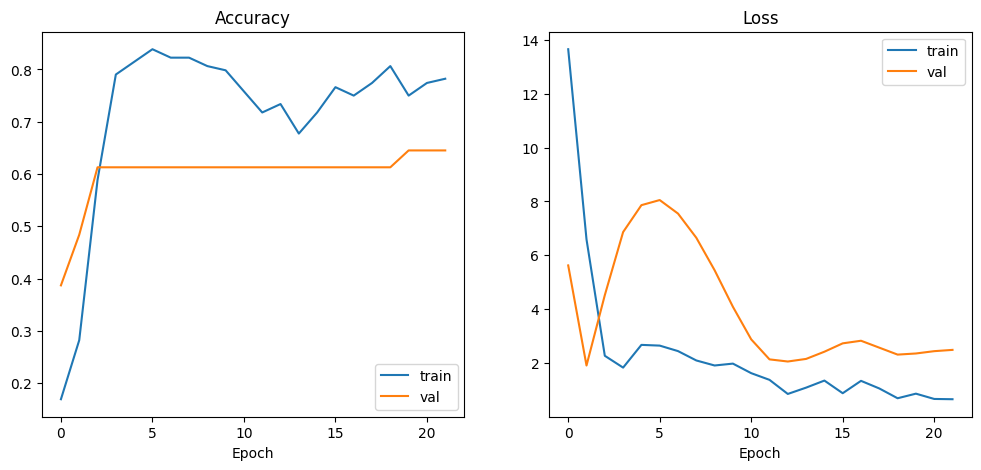

In [33]:
# Step 16: Compute accuracy score
import numpy as np

# Show the best validation accuracy
best_val_acc = np.max(my_history.history['val_accuracy'])
print(f"Best validation accuracy: {best_val_acc:.4f}")

# Show the best validation loss
best_val_loss = np.min(my_history.history['val_loss'])
print(f"Best validation loss: {best_val_loss:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(my_history.history['accuracy'], label='train')
plt.plot(my_history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(my_history.history['loss'], label='train')
plt.plot(my_history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

## **Assignment Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Assignment_01.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Poly-A Tail**

## **DeepSeek**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/DeepSeek_logo.svg/1920px-DeepSeek_logo.svg.png)

**DeepSeek** (Chinese: 深度求索; pinyin: Shēndù Qiúsuǒ) is a Chinese artificial intelligence company that develops open-source large language models (LLMs). Based in Hangzhou, Zhejiang, it is owned and funded by Chinese hedge fund High-Flyer, whose co-founder, Liang Wenfeng, established the company in 2023 and serves as its CEO.

The DeepSeek-R1 model provides responses comparable to other contemporary large language models, such as OpenAI's GPT-4o and o1. It is trained at a significantly lower cost—stated at US$6 million compared to $100 million for OpenAI's GPT-4 in 2023—and approximately a tenth of the computing power used for Meta's comparable model, LLaMA 3.1. DeepSeek's AI models were developed amid United States sanctions on China and other countries for chips used to develop artificial intelligence, which were intended to restrict the ability of these countries to develop advanced AI systems. Lesser restrictions were later announced that would affect all but a few countries.

On 10 January 2025, DeepSeek released its first free chatbot app, based on the DeepSeek-R1 model, for iOS and Android; by 27 January, DeepSeek had surpassed ChatGPT as the most-downloaded free app on the iOS App Store in the United States,[10] causing Nvidia's share price to drop by 18%. DeepSeek's success against larger and more established rivals has been described as "upending AI"[10] and ushering in "a new era of AI brinkmanship". DeepSeek's compliance with Chinese government censorship policies and its data collection practices have also raised concerns over privacy and information control in the model, prompting regulatory scrutiny in multiple countries.

DeepSeek makes its generative artificial intelligence algorithms, models, and training details open-source, allowing its code to be freely available for use, modification, viewing, and designing documents for building purposes.However, reports indicate that the API version hosted in China applies content restrictions in accordance with local regulations, limiting responses on topics such as the Tiananmen Square massacre and Taiwan’s status. The company reportedly vigorously recruits young AI researchers from top Chinese universities, and hires from outside the computer science field to diversify its models' knowledge and abilities.

**Background**

In February 2016, High-Flyer was co-founded by AI enthusiast Liang Wenfeng, who had been trading since the 2007–2008 financial crisis while attending Zhejiang University. They began stock-trading with a deep learning model running on GPU on October 21, 2016. Prior to this, they used CPU-based models, mainly linear models. Most trading was done by AI by the end of 2017.

By 2019, he established High-Flyer as a hedge fund focused on developing and using AI trading algorithms. By 2021, High-Flyer exclusively used AI in trading, often using Nvidia chips. DeepSeek has made its generative artificial intelligence chatbot open source, meaning its code is freely available for use, modification, and viewing. This includes permission to access and use the source code, as well as design documents, for building purposes.

In 2021, while running High-Flyer, Liang began stockpiling Nvidia GPUs for an AI project.[20] According to 36Kr, Liang had built up a store of 10,000 Nvidia A100 GPUs, which are used to train AI, before the United States federal government imposed AI chip restrictions on China.

On 14 April 2023,[22] High-Flyer announced the start of an artificial general intelligence lab dedicated to research developing AI tools separate from High-Flyer's financial business. Incorporated on 17 July 2023, with High-Flyer as the investor and backer, the lab became its own company, DeepSeek. Venture capital firms were reluctant to provide funding, as they considered it unlikely that the venture would be able to generate an "exit" in a short period of time.

On May 16, 2023, the company Beijing DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. incorporated under the control of Hangzhou DeepSeek Artificial Intelligence Basic Technology Research Co., Ltd. As of May 2024, Liang Wenfeng held 84% of DeepSeek through two shell corporations.

After releasing DeepSeek-V2 in May 2024, which offered strong performance for a low price, DeepSeek became known as the catalyst for China's AI model price war. It was quickly dubbed the "Pinduoduo of AI", and other major tech giants such as ByteDance, Tencent, Baidu, and Alibaba began to cut the price of their AI models to compete with the company. Despite the low price charged by DeepSeek, it was profitable compared to its rivals that were losing money.

DeepSeek is focused on research and has no detailed plans for commercialization, which also allows its technology to avoid the most stringent provisions of China's AI regulations, such as requiring consumer-facing technology to comply with the government's controls on information.

DeepSeek's hiring preferences target technical abilities rather than work experience, resulting in most new hires being either recent university graduates or developers whose AI careers are less established. Likewise, the company recruits individuals without any computer science background to help its technology understand other topics and knowledge areas, including being able to generate poetry and perform well on the notoriously difficult Chinese college admissions exams (Gaokao).

**Training framework**

High-Flyer/DeepSeek has built at least two computing clusters, Fire-Flyer (萤火一号) and Fire-Flyer 2 (萤火二号). Fire-Flyer began construction in 2019 and finished in 2020, at a cost of 200 million yuan. It contained 1,100 GPUs interconnected at a rate of 200 Gbps. It was 'retired' after 1.5 years in operation. Fire-Flyer 2 began construction in 2021 with a budget of 1 billion yuan.[18] It was reported that in 2022, Fire-Flyer 2's capacity had been utilized at over 96%, totaling 56.74 million GPU hours. Of those GPU hours, 27% was used to support scientific computing outside the company.

Fire-Flyer 2 consisted of co-designed software and hardware architecture. On the hardware side, there are more GPUs with 200 Gbps interconnects. The cluster is divided into two "zones", and the platform supports cross-zone tasks. The network topology was two fat trees, chosen for its high bisection bandwidth. On the software side, there are

* **3FS (Fire-Flyer File System):** A distributed parallel file system. It was specifically designed for asynchronous random reads from a dataset, and uses Direct I/O and RDMA Read. In contrast to standard Buffered I/O, Direct I/O does not cache data. Caching is useless for this case, since each data read is random, and would not be reused.
* **hfreduce:** Library for asynchronous communication, originally designed to replace Nvidia Collective Communication Library (NCCL).[30] It was mainly used for allreduce, especially of gradients during backpropagation. It is asynchronously run on the CPU to avoid blocking kernels on the GPU.[28] It uses two-tree broadcast like NCCL.
* **hfai.nn:** Software library of commonly used operators in neural network training, similar to torch.nn in PyTorch.
* **HaiScale Distributed Data Parallel (DDP):** Parallel training library that implements various forms of parallelism in deep learning such as Data Parallelism (DP), Pipeline Parallelism (PP), Tensor Parallelism (TP), Experts Parallelism (EP), Fully Sharded Data Parallel (FSDP) and Zero Redundancy Optimizer (ZeRO). It is similar to PyTorch DDP, which uses NCCL on the backend.
* **HAI Platform:** Various applications such as task scheduling, fault handling, and disaster recovery.
During 2022, Fire-Flyer 2 had 5000 PCIe A100 GPUs in 625 nodes, each containing 8 GPUs. At the time, they chose to exclusively use PCIe instead of DGX version of A100, since at the time the models they trained could fit within a single 40 GB GPU VRAM, so there was no need for the higher bandwidth of DGX (i.e. they required only data parallelism but not model parallelism).[30] Later, they also incorporated NVLinks and NCCL, to train larger models that required model parallelism.